# Chapter 2 Image files and File Types

In [1]:
import skimage as skim
import skimage.io as io
import matplotlib.pyplot as plt

In [2]:
#image read in as a grayscale image
lady = io.imread("img/ladyEdge.png", as_gray=True)

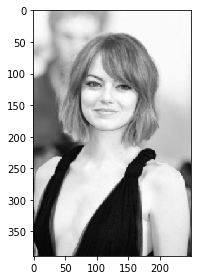

In [3]:
#show the image in the jupyter console
# seems to use Matplotlib
io.imshow(lady)

In [4]:
"""
ImageViewer is depreciated, see
https://scikit-image.org/docs/stable/user_guide/visualization.html
"""
# #interactive display
# from skimage.viewer import ImageViewer as IV
# view = IV(lady)
# view.show()

'\nImageViewer is depreciated, see\nhttps://scikit-image.org/docs/stable/user_guide/visualization.html\n'

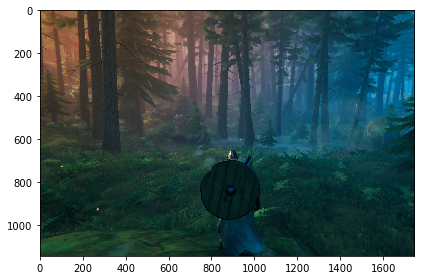

In [5]:
#you can even show images directly
io.imshow("img/viking scene.png")

## RGB Images
colors in an image need to be defined in a standard way. usually it is as a subset of a 3D coordinate systen, called a **Color Model**. there are many different methods for descrining color, but a common model is **RGB**. in **RGB** we can imagine that the colors are inside a "color cube"

![image](figures/figure-2-3.png)

RGB is a standard for the *display* of colors, but it is not a good way of **describing colors**.

In [6]:
viking = io.imread("img/viking resting.png")

In [7]:
viking.shape

(1101, 1614, 4)

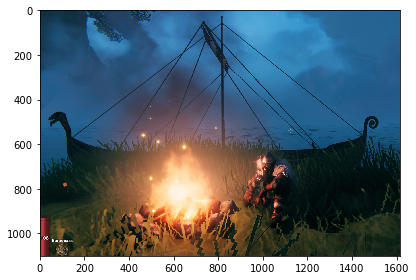

In [8]:
io.imshow(viking)

to obtain any of the RGB values at a given location, you use indexing

get the pixel at row 101, and col 201, and all channels

In [9]:
#NOTE: it seems that an alpha channel is present in this particular image
viking[100, 200, :]

array([ 25,  63,  91, 255], dtype=uint8)

In [10]:
lady[100, 200]

0.9450980392156864

## Information about your Image
to obtain image information in python, we need to invoke a library that can extract *image metadata*. **exif data** is often created by cameras and other capture devices, they include technical information about an image and it's capture method, such as: exposure settings, capture time, GPS location, and camera model

In [11]:
#one way to do it
#import exifread
#tags = exifread.process_file(viking, details=False)

In [12]:
#to extract images from PIL
from PIL import Image
from PIL.ExifTags import TAGS

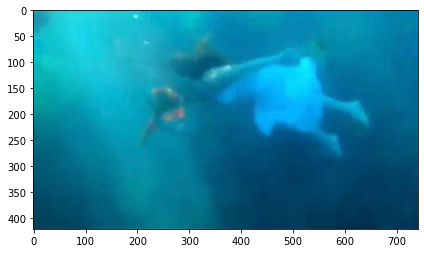

In [13]:
image = Image.open("img/IMG_7021.jpg")
exifdata = image.getexif()
io.imshow("img/IMG_7021.jpg")

In [14]:
for tagid in exifdata:
    #getting the tag name instead of tag id
    tagname = TAGS

    #passing the tagid to get its respective value
    value = exifdata.get(tagid)

    print(tagname, ": ", value)

{1: 'InteropIndex', 11: 'ProcessingSoftware', 254: 'NewSubfileType', 255: 'SubfileType', 256: 'ImageWidth', 257: 'ImageLength', 258: 'BitsPerSample', 259: 'Compression', 262: 'PhotometricInterpretation', 263: 'Thresholding', 264: 'CellWidth', 265: 'CellLength', 266: 'FillOrder', 269: 'DocumentName', 270: 'ImageDescription', 271: 'Make', 272: 'Model', 273: 'StripOffsets', 274: 'Orientation', 277: 'SamplesPerPixel', 278: 'RowsPerStrip', 279: 'StripByteCounts', 280: 'MinSampleValue', 281: 'MaxSampleValue', 282: 'XResolution', 283: 'YResolution', 284: 'PlanarConfiguration', 285: 'PageName', 288: 'FreeOffsets', 289: 'FreeByteCounts', 290: 'GrayResponseUnit', 291: 'GrayResponseCurve', 292: 'T4Options', 293: 'T6Options', 296: 'ResolutionUnit', 297: 'PageNumber', 301: 'TransferFunction', 305: 'Software', 306: 'DateTime', 315: 'Artist', 316: 'HostComputer', 317: 'Predictor', 318: 'WhitePoint', 319: 'PrimaryChromaticities', 320: 'ColorMap', 321: 'HalftoneHints', 322: 'TileWidth', 323: 'TileLengt

## Numeric Types and Convcersion
elements in an array representing an image may have a number of different numeric data types
* boolean - 0 or 1
* int8 - -128 - 127
* uint8 - 0 - 255
* int16 - -32768 - 32767
* double - machine specific (single precision, double precision, etc)

In [15]:
import numpy as np
a = 23
b = np.uint8(a)
%whos int np.uint8

Variable   Type    Data/Info
----------------------------
a          int     23
tagid      int     283


NOTE that *%whos* is a magic function of IPython. even though a and b have the same value, they use a different datatype. a grayscale image, usually, contains pixels whos values of are datatype uint8. However, we can convert images of one type to another.

In [16]:
lady.dtype

dtype('float64')

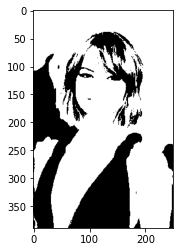

In [17]:

ladyBool = skim.img_as_bool(lady)
#skimage behaves strangly with bollean images, have to use matplotlib.pyplot
plt.imshow(ladyBool, cmap="gray")

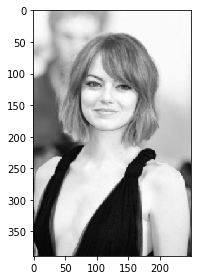

In [18]:
ladyInt16 = skim.img_as_int(lady)
io.imshow(ladyInt16)

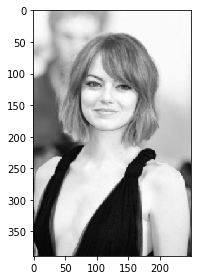

In [19]:
ladyUInt16 = skim.img_as_uint(lady)
io.imshow(ladyInt16)

## Images Files and Formats
an **image format** will contain some **header information** that will, at the very least, include teh size of the image in pixels. it may also include the color map, compression used, and a description of the image



### Portable Network Graphics (PNG)
a very genral image format. designed as a replacement for GIF images.

it supports:
* binary
* grayscale
* RGB
* indexed

### Joint Photographics Experts Group (JPEG)
images created using the Join Photographics Experts Group compression method

### Tagged Image File Format (TIFF)
tagged image file format

support:
* different compression methods
* multiple images per file
* binary
* grayscale
* truecolor
* indexed

### Graphics Interchange Format (GIF)
an old data transfer format, somewhat restricted in teh image types it can handle

### Microsoft Bit Map (BMP)


## a Hexedecimal Dump Function

In [20]:
from hexdump import hexdump

In [21]:
#TODO fix this
hexdump("img/ladyEdge.png", 16)

TypeError: ord() expected string of length 1, but int found

## Vector VS Raster Images
* **Vector Images** - stores image information as a **collection of lines or vectors**
    * can be magnified to any size without losing sharpness
    * not very cood for the represntation fo natural scenes
    * standard vector format is **Adobe PostScript**
* **Raster Images** - stores image information as a **colleciton of dots (pixels)**
    * stores raster inforamtion
        * lest of gray values or color intensities
    * images captured via digital means - cameras or scanners

## A Simple Raster Fromat (PGM)
the **ASCII PGM** format is a conversion format, designed to be extremely simple.

![image](figures/figure-2-4.png)

structure:
* begins with P2 - this indicates that it is an ASCII PGM file 
    * P5 for binary PGB
* comment (#) file
    * any line with a *#* at teh beginnign is treated as a comment line
* number of columns and rows
* number of grayscales
* pixel information
    * spaces and carriage returns are delimiters
    * could be written as one very long line or one very long column

an advantage of this file is that it is very simple, a disadvantage is that it produces very large files. colored images are stored as three matrices. does not support color maps. collectively cals PNM images.

NOTE TO SELF: need to read the rest of this section

## Writing Image files
in python, a matrix (any matrix) can be written to an image file with the *imsave* function

the file extension is used to denote teh file type:
* gif
* jpg
* tif
* bmp
* etc

In [23]:
io.imsave("img/ladyBoolTemp.tif", ladyBool)

C:\Users\JUDE\AppData\Local\Temp/ipykernel_2016/959708729.py:1: UserWarning: img/ladyBoolTemp.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave("img/ladyBoolTemp.tif", ladyBool)


In [24]:
#exercise 2
from skimage import data

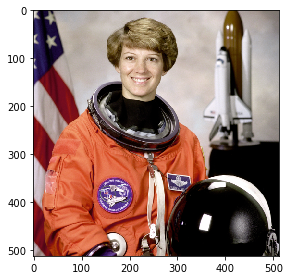

In [27]:
io.imshow(data.astronaut())

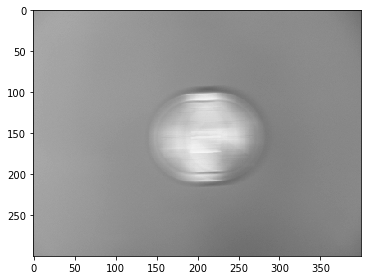

In [28]:
io.imshow(data.clock())

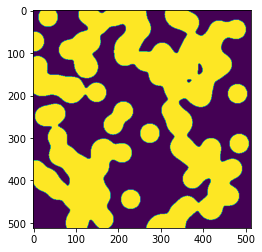

In [30]:
plt.imshow(data.binary_blobs() )

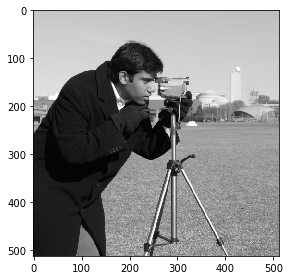

In [33]:
io.imshow(data.camera())